<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Medical-Expenses-using-Regression/blob/main/Medical%20Expenses%20using%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer.

We're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [2]:
data_01=pd.read_csv("https://raw.githubusercontent.com/UM1412/Data-Set/main/Github%20ML%20Project01%20Data01.csv")
data_01.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Conclusion : The dataset contains 1338 rows and 7 Columns.

In [3]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data_01.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data_01.shape

(1338, 7)

Conclusion : The Shape Of Our Data Set Matrix Is 1338 X 7

#Data Visualization

##Univariate Analyses 

In [6]:
age_01 = px.histogram(data_01,x="age",marginal='box',nbins=47,title="Age's Distribution")

age_01.update_layout(bargap=0.1)
age_01.show()

Conclusion : Age is column is approximately distributed uniformly expect the age 18 and 19 which has high frequency as compared toother ages.

In [7]:
bmi_01 = px.histogram(data_01,x="bmi",marginal='box',color_discrete_sequence=["red"],
title="Body Mass Index's Distribution")

bmi_01.update_layout(bargap=0.1)
bmi_01.show()

Conclusion : Body Mass Index is distributed normally with few outliers. 68 %
of customers are in the range of 25 to 35 Body Mass Index which is overweight.

In [8]:
chid_01 = px.histogram(data_01,x="children",title="Child's Count")
chid_01.update_layout(bargap=0.1)
chid_01.show()

In [9]:
charges_01 = px.histogram(data_01,x="charges",marginal="box",title="Charge's Distribution")

charges_01.update_layout(bargap=0.1)
charges_01.show()

Conclusion : Distribution of charges is quiet differen, here most of the values are below
15000 and has more outliers.
The median charges are 9K but the max charge is 63.

Visualization of the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer.Values in the "smoker" column is used to color the points. Hover Data shows "sex".

In [10]:
smoke_01= px.histogram(data_01,x="smoker",title="Count of Smoker")

smoke_01.show()

Conclusion : 20% of the people has the smoker and remaining is non smokers

In [11]:
region_01 = px.histogram(data_01,x="region",title="Region's Distribution")
region_01.show()

Conclusion : Roughly every region has equal customers, southeast has 40 more customer than other regions

##Bivariate Analyses 

Visualization of the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer.Values in the "smoker" column is used to color the points. Hover Data shows "sex".

In [12]:
ageVscharage_01 = px.scatter(data_01,x="age",y="charges",title="Age Verses Charges")
ageVscharage_01.show()

Conclusion : 
As age increases then the price also increases.
The minimum charges for custmer who smokes is 12K and maximum is 63K,
also minimum charges for customer who dont smoke is 1.2K and maximum is 36 K.**This shows that when the customer smoke the charges increases significantly.**

In [13]:
chargesVSsmoke_01 = px.histogram(data_01,x='charges',marginal="box",color="smoker",color_discrete_sequence=['green','grey'],title="Yearly Medical Charges")

chargesVSsmoke_01.update_layout(bargap=0.15)
chargesVSsmoke_01.show()

Conclusion : 
The Customer who doesn't smoke have low charges as campared to the customer who smoke
**Thus smoker and charges has strong correlation**

In [14]:
chargesVssex_01 = px.histogram(data_01,x="charges",color="sex",color_discrete_sequence=["red",'blue'],title = "Charges with sex")

chargesVssex_01.update_layout(bargap=0.15)
chargesVssex_01.show()

In [15]:
chargesVssex_01 = px.histogram(data_01,x="charges",color="region",color_discrete_sequence=["red",'blue','green','pink'],title = "Distribution of charges with sex")

chargesVssex_01 .update_layout(bargap=0.15)
chargesVssex_01 .show()

In [16]:
smokerVssex_01 = px.histogram(data_01,x="smoker",color='sex',title="Smoker and Non Smoker with Sex")

smokerVssex_01 .update_layout(bargap=0.15)
smokerVssex_01 .show()

In [17]:
sexVssmoker_01 = px.histogram(data_01,x="sex",title="Count of Male and Female",color="smoker")

sexVssmoker_01 .update_layout(bargap=0.15)
sexVssmoker_01 .show()

In [18]:
smokervsregion_01 = px.histogram(data_01,x="region",color="smoker",title="Smoker in each region")

smokervsregion_01 .update_layout(bargap=0.15)
smokervsregion_01 .show()

In [19]:
countvschild_01 = px.histogram(data_01,x="children",color="smoker",title="Smoker Vs Children")

countvschild_01.update_layout(bargap=0.15)
countvschild_01.show()

In [20]:
bmiVscharges_01 = px.scatter(data_01,x="bmi",y='charges',title="BMI vs Charges",color="smoker")

bmiVscharges_01.update_layout(bargap=0.15)
bmiVscharges_01.show()

In [21]:
sexVscharges_02 = px.violin(data_01,x="sex",y="charges",title="Sex vs Charges",color="smoker")

sexVscharges_02.update_layout(bargap=0.15)
sexVscharges_02.show()

In [22]:
sexVscharges_03 = px.violin(data_01,x="region",y="charges",title="Sex vs Charges")

sexVscharges_03.update_layout(bargap=0.15)
sexVscharges_03.show()

Text(0.5, 1.0, 'Correlation Matrix')

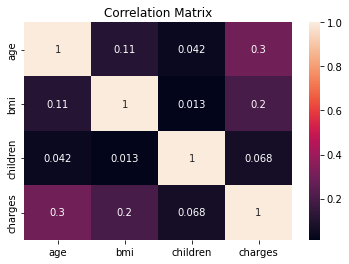

In [23]:
correlation_01 = sns.heatmap(data_01.corr(),annot=True)
plt.title("Correlation Matrix")

#Regression Analysis 

##Data Preprocessing 

In [24]:
data_01['sex_code']=data_01.sex.map({'female':0,'male':1})
data_01['smoker_code']=data_01.smoker.map({'no':0,'yes':1})
data_01

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [25]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   sex_code     1338 non-null   int64  
 8   smoker_code  1338 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 94.2+ KB


In [26]:
data_01=pd.get_dummies(data_01, columns=['region'])
data_01

,age,sex,bmi,children,smoker,charges,sex_code,smoker_code,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,0,0,1,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,0,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,0,0,0,1


## Createing Model

In [27]:
columns_01 = ['age', 'sex_code','bmi', 'children', 'smoker_code','region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
inputs,targets=data_01[columns_01],data_01['charges']

In [28]:
model_01 = LinearRegression()

In [29]:
model_01.fit(inputs,targets)

LinearRegression()

In [30]:
predictions_01 = model_01.predict(inputs)

In [31]:
def rmse(targets,predictions):
    return np.sqrt(np.mean([val**2 for val in (targets-predictions_01)]))

##Prediction 

In [32]:
loss_01 = rmse(targets,predictions_01)
r_square = model_01.score(inputs,targets)

In [33]:
print('Loss:',loss_01,"\n",' R^2 score:',r_square)

Loss: 6041.6796511744515 
  R^2 score: 0.7509130345985207


#Output 

In [34]:
data_01= pd.DataFrame({
    'feature': np.append(['age', 'bmi', 'children','smoker_code', 'sex_code', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], 1),
    'weight': np.append(model_01.coef_, model_01.intercept_)
})

In [35]:
data_01.sort_values('weight', ascending=False)

,feature,weight
4,sex_code,23848.534542
5,region_northeast,587.009235
3,smoker_code,475.500545
2,children,339.193454
0,age,256.856353
6,region_northwest,234.045336
1,bmi,-131.314359
8,region_southwest,-373.041756
7,region_southeast,-448.012814
9,1,-12525.547811
